In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

In [64]:
burnoutdf = pd.read_csv("/content/drive/MyDrive/employee_burnout_analys.csv")
burnoutdf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [65]:
burnoutdf["Date of Joining"] = pd.to_datetime(burnoutdf["Date of Joining"])

In [66]:
burnoutdf.shape

(22750, 9)

In [67]:
burnoutdf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [68]:
burnoutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [69]:
burnoutdf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [70]:
burnoutdf.tail

<bound method NDFrame.tail of                     Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-10-03  Female      Product   
3      fffe32003400380032003900      2008-03-11    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-05-11    Male      Service   
22748  fffe33003300320036003900      2008-10-01  Female      Service   
22749      fffe3400350031003800      2008-06-01    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2    

In [71]:
burnoutdf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [72]:
burnoutdf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [73]:
burnoutdf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22745    False
22746    False
22747    False
22748    False
22749    False
Length: 22750, dtype: bool

In [74]:
burnoutdf.duplicated().sum()

0

In [75]:
for i,col in enumerate(burnoutdf.columns):
  print(f"\n\n{burnoutdf[col].unique()}")
  print(f"\n{burnoutdf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-10-03T00:00:00.000000000' '2008-03-11T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-09-03T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-12-05T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [76]:
burnoutdf=burnoutdf.drop(['Employee ID'],axis=1)

In [77]:

intFloatburnoutdf=burnoutdf.select_dtypes([np.int,np.float])
for i,col in enumerate(intFloatburnoutdf.columns):
  if(intFloatburnoutdf[col].skew() >= 0.1):
    print("\n",col,"Positive Skewed and its value is:" , intFloatburnoutdf[col].skew())
  elif(intFloatburnoutdf[col].skew() <= -0.1):
    print("\n",col,"Negatively Skewed and its value is:" , intFloatburnoutdf[col].skew())
  else:
    print("\n",col,"Normally Distributed and its value is:" , intFloatburnoutdf[col].skew())



 Designation Normally Distributed and its value is: 0.09242138478903683

 Resource Allocation Positive Skewed and its value is: 0.20457273454318103

 Mental Fatigue Score Negatively Skewed and its value is: -0.4308950578815428

 Burn Rate Normally Distributed and its value is: 0.045737370909640515


In [78]:

burnoutdf['Resource Allocation'].fillna(burnoutdf['Resource Allocation'].mean(),inplace=True)
burnoutdf['Mental Fatigue Score'].fillna(burnoutdf['Mental Fatigue Score'].mean(),inplace=True)
burnoutdf['Burn Rate'].fillna(burnoutdf['Burn Rate'].mean(),inplace=True)

In [79]:

burnoutdf

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.000000,3.800000,0.16
1,2008-11-30,Male,Service,Yes,1,2.000000,5.000000,0.36
2,2008-10-03,Female,Product,Yes,2,4.481398,5.800000,0.49
3,2008-03-11,Male,Service,Yes,1,1.000000,2.600000,0.20
4,2008-07-24,Female,Service,No,3,7.000000,6.900000,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1,3.000000,5.728188,0.41
22746,2008-01-19,Female,Product,Yes,3,6.000000,6.700000,0.59
22747,2008-05-11,Male,Service,Yes,3,7.000000,5.728188,0.72
22748,2008-10-01,Female,Service,No,2,5.000000,5.900000,0.52


In [80]:
burnoutdf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [81]:
burnoutdf.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


**DATA VISUALIZATION**

In [82]:
corr=burnoutdf.corr()
sn.set(rc={'figure.figsize':(10,8)})
fig=px.imshow(corr,text_auto=True,aspect="auto")
fig.show()

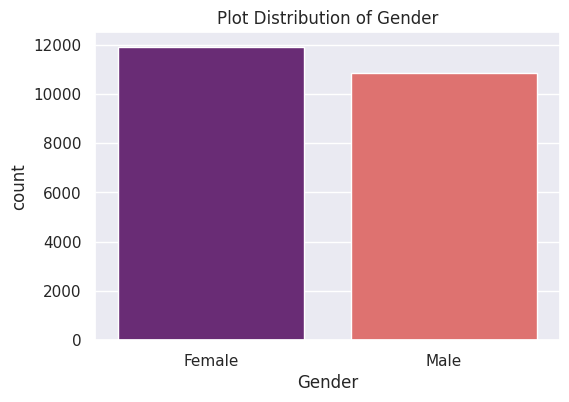

In [83]:
plt.figure(figsize=(6,4))
sn.countplot(x="Gender",data=burnoutdf,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

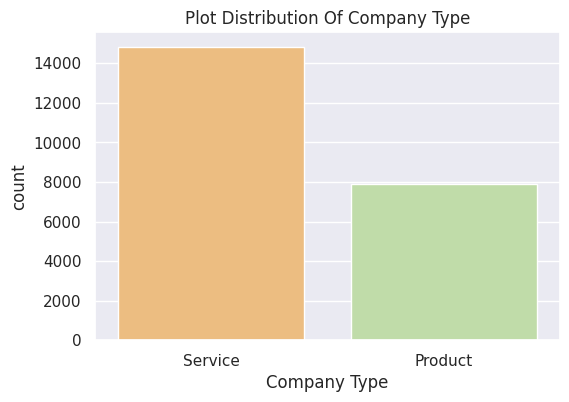

In [84]:
plt.figure(figsize=(6,4))
sn.countplot(x="Company Type",data=burnoutdf,palette="Spectral")
plt.title("Plot Distribution Of Company Type")
plt.show()

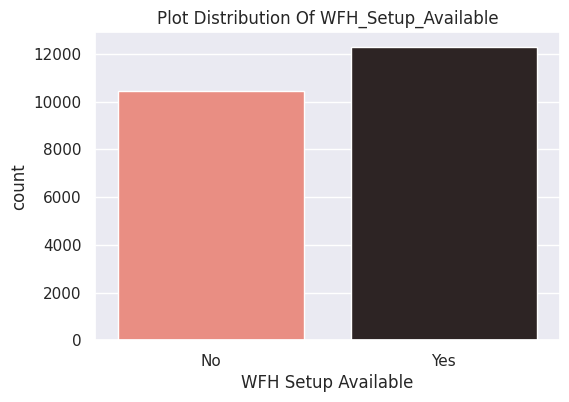

In [85]:
plt.figure(figsize=(6,4))
sn.countplot(x="WFH Setup Available",data=burnoutdf,palette="dark:salmon_r")
plt.title("Plot Distribution Of WFH_Setup_Available")
plt.show()

In [86]:
burn_st=burnoutdf.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st,x=col,title="Plot Distribution of"+col,color_discrete_sequence=['yellow'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [87]:
fig = px.line(burnoutdf,y="Burn Rate",color="Designation",title="Burn rate basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(bargap=0.1)
fig.show()

In [88]:
fig = px.line(burnoutdf,y="Burn Rate",color="Gender",title="Burn rate basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(bargap=0.2)
fig.show()

In [89]:
fig = px.line(burnoutdf,y="Mental Fatigue Score",color="Designation",title="Mental Fatigue Score of Designation",color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(bargap=0.1)
fig.show()

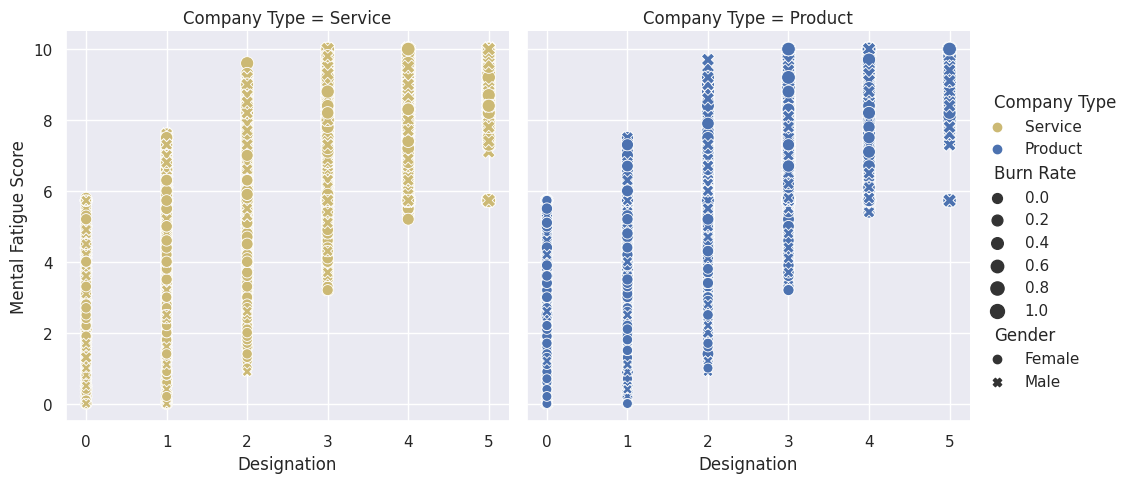

In [90]:
sn.relplot(
    data=burnoutdf,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type",size="Burn Rate",style="Gender",palette=["y","b"],sizes=(50,100)
)

**LABEL ENCODING**

In [91]:
from sklearn import preprocessing
Lencode=preprocessing.LabelEncoder()

In [92]:
burnoutdf['GenderLabel']=Lencode.fit_transform(burnoutdf['Gender'].values)
burnoutdf['Company_TypeLabel']=Lencode.fit_transform(burnoutdf['Company Type'].values)
burnoutdf['WFH_Setup_AvailableLabel']=Lencode.fit_transform(burnoutdf['WFH Setup Available'].values)

In [93]:
mn=burnoutdf.groupby('Gender')
mn=mn['GenderLabel']
mn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [94]:
co=burnoutdf.groupby('Company Type')
co=co['Company_TypeLabel']
co.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [95]:
wfh=burnoutdf.groupby('WFH Setup Available')
wfh=wfh['WFH_Setup_AvailableLabel']
wfh.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [96]:
burnoutdf.tail(15)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22735,2008-07-26,Male,Service,No,3,7.0,7.300000,0.640000,1,1,0
22736,2008-04-18,Male,Service,Yes,4,7.0,7.700000,0.650000,1,1,1
22737,2008-08-17,Female,Service,No,3,5.0,5.728188,0.430000,0,1,0
22738,2008-12-23,Male,Service,Yes,0,1.0,4.900000,0.290000,1,1,1
22739,2008-06-02,Male,Service,No,2,5.0,8.500000,0.670000,1,1,0
22740,2008-05-09,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0
22741,2008-07-01,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0


**FEATURE SELECTION**

In [97]:
Columns=['Designation','Resource Allocation','Mental Fatigue Score','GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=burnoutdf[Columns]
y=burnoutdf['Burn Rate']

In [98]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [99]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


**Implementing PCA(Principle Component Analysis)**

In [100]:
from sklearn.decomposition import PCA
pca = PCA(0.97)
x_pca=pca.fit_transform(x)
print("PCA shape of x is:",x_pca.shape,"and original shape is:",x.shape)
print("% of selected features is:",pca.explained_variance_ratio_)
print("Number of features selected through PCA is:",pca.n_components_)

PCA shape of x is: (22750, 5) and original shape is: (22750, 6)
% of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422 0.02438192]
Number of features selected through PCA is: 5


**DATA SPLITTING**

In [101]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test,Y_train,Y_test = train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [102]:
print(X_train_pca.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 5) (5688, 5) (17062,) (5688,)


**MODEL IMPLEMENTION**

**RANDOM FOREST REGRESSION**

In [103]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca,Y_train)

train_prd_rf=rf_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_prd_rf)
test_prd_rf=rf_model.predict(X_test)
test_r2=r2_score(Y_test,test_prd_rf)



print("Accuracy of train data:"+str(round(100*train_r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")
print(train_r2)

Accuracy of train data:91.1963%
Accuracy of test data:83.8182%
0.9119633566351519


In [104]:
from sklearn.ensemble import AdaBoostRegressor

abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca,Y_train)

train_prd_abr=abr_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_prd_abr)
test_prd_abr=abr_model.predict(X_test)
test_r2=r2_score(Y_test,test_prd_abr)



print("Accuracy of train data:"+str(round(100*train_r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:77.7263%
Accuracy of test data:77.3261%


**Linear Regression**

In [105]:
from sklearn.model_selection import train_test_split

X_train_pca,X_test,Y_train,Y_test = train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [107]:
model.fit(X_train_pca,Y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, auc

mae=mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

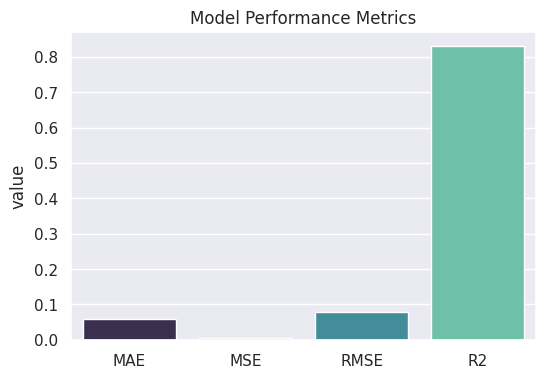

In [110]:
plt.figure(figsize=(6,4))
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]
sn.barplot(x=metrics, y=values, palette='mako')
plt.title('Model Performance Metrics')
plt.ylabel('value')
plt.show()


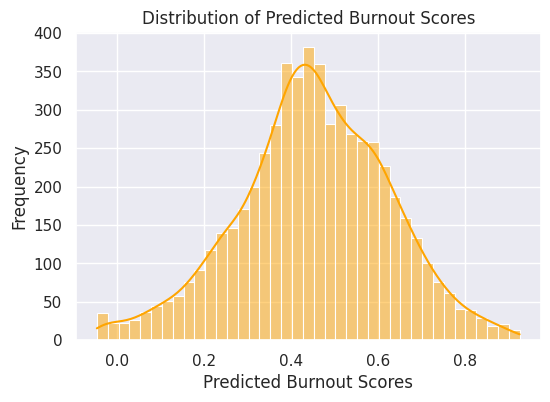

In [111]:
plt.figure(figsize=(6, 4))
sn.histplot(y_pred, kde=True, color='orange', alpha = 0.5)
plt.title('Distribution of Predicted Burnout Scores')
plt.xlabel('Predicted Burnout Scores')
plt.ylabel('Frequency')
plt.show()


In [112]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.05768356934321891
Mean Squared Error: 0.006292184208631729
Root Mean Squared Error: 0.07932328919448392
R2 Score: 0.8293740566003773
